# Lab03: Linear Regression.

- Student ID: 21120511 
- Student name: Lê Nguyễn

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Rename your notebook with `ID.ipynb` (for example, if your ID is 1234567, rename your notebook with `1234567.ipynb`) and submit it on moodle. In `ID.zip` must have only `ID.ipynb`

**Contents:**

- Linear Regression.

### 1. The hypothesis set

- Linear regression is a **linear** model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x).
- Generally, a linear model will make predictions by calculating a weighted sum of the input features (independent variables). 
$$ \hat{y}=w_0+w_1x_1+w_2x_2+...+w_nx_n $$

- $\hat{y}$ is the predicted value.
- $n$ is the number of features.
- $x_i$ is the $i^{th}$ feature value.
- $w_j$ is the $j^{th}$ model parameter (including the bias term $w_0$ and the feature weights $w_1,w_2,...w_n$).

$$\hat{y}=h_{\mathbf{w}}\left(\mathbf{x}\right)=\mathbf{w}^{T}\cdot\mathbf{x}$$

- $\mathbf{w}$ is the model **parameter vector** (including the bias term $w_0$ and the feature weights $w_1,w_2,...w_n$).
- $\mathbf{w}^T$ is a transpose  of $\mathbf{w}$ (a row vector insteade of column vector).
- $\mathbf{x}$ is the instance's **feature vector**, *containing* $x_0$ to $x_n$, with $x_0$ *always equal to* 1.
- $\mathbf{w}^{T}\cdot\mathbf{x}$ is the dot product of $\mathbf{w}^T$ and $\mathbf{x}$.
- $h_{\mathbf{w}}$ is the hypothesis function, using the parameters $\mathbf{w}$.

![Bias](Bias.png)

### 2. Performance measure and the learning goal

- Before we start to train the model, we need to determine how good the model fits the training data. There are a couple of ways to determine the level of quality, but we are going to use the most popular one and that is the **MSE** (Mean Square Error). We need to find the value for $\mathbf{w}$ that will minimize the MSE:
$$\mathbf{w}=\arg\min MSE_{\mathcal{D}_{train}}$$


- MSE on the train set $\mathcal{D}_{train}$ denoted as $\left(\mathbf{X},\mathbf{y}\right)$ including m samples $\left\{\left(\mathbf{x}_1,y_1\right),\left(\mathbf{x}_2,y_2\right),...\left(\mathbf{x}_m,y_m\right)\right\}$

$$MSE\left(X,h_{\mathbf{w}}\right)=\dfrac{1}{m}\sum_{i=1}^{m}\left(\mathbf{w}^T\cdot\mathbf{x}_i - y_i\right )^2$$
$$MSE\left(X,h_{\mathbf{w}}\right)=\dfrac{1}{m}\Vert\mathbf{X}\mathbf{w}-\mathbf{y}\Vert^2$$

Example below is a plot of an MSE function where the true target value is 100, and the predicted values range between -10,000 to 10,000. The MSE loss (Y-axis) reaches its minimum value at prediction (X-axis) = 100. The range is 0 to ∞.
![Plot of MSE Loss (Y-axis) vs. Predictions (X-axis)](MSE.png)

- To find the value of $\mathbf{w}$ that minimizes the MSE cost function, the most common way (*we have known since high school*) is to solve the derivative (gradient) equation. 
$$\mathbf{\hat{w}}=\left(\mathbf{X}^T  \mathbf{X}\right)^{\dagger}  \mathbf{X}^T  \mathbf{y}$$
  - $\mathbf{\hat{w}}$ is the value of $\mathbf{w}$ that minimizes the cost function
  - **Notice that** $\mathbf{X}^T  \mathbf{X}$ is not always invertible. $\left(\mathbf{X}^T  \mathbf{X}\right)^{\dagger}$ is pseudo-inverse of $\left(\mathbf{X}^T \mathbf{X}\right)$ - a general case of inverse when the matrix is not invertible or not even square.

### 3. Implementation 

#### Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import sklearn.datasets as datasets
%matplotlib inline

#### Create data

In [2]:
X,y=datasets.make_regression(n_samples=100,n_features=1, noise=5)

#### Load and visualize data

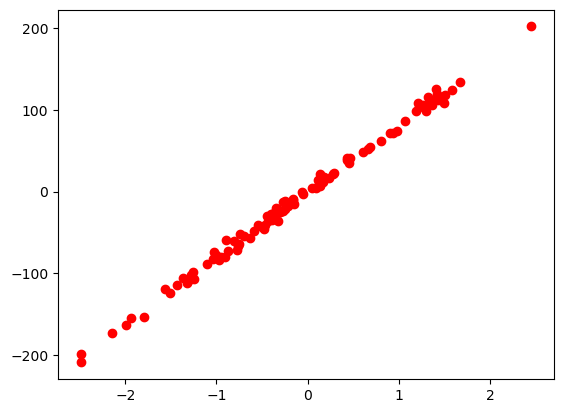

In [3]:
# Visualize data 
plt.plot(X, y, 'ro')
plt.show()

**TODO:** 

- Your observation about data: 
    - Đầu tiên, ta có thể thấy dữ liệu có xu hướng tuyến tính (tập trung tạo thành hình đường thẳng).
    - Tiếp theo, các đặc trưng (X) chỉ có một chiều.

#### Training function

In [4]:
def train_linear_regression(X, y):
    '''
    Trains Linear Regression on the dataset (X, y).
    
    Parameters
    ----------
    X : numpy array, shape (m, d + 1)
        The matrix of input vectors (each row corresponds to an input vector); 
        the first column of this matrix is all ones (corresponding to x_0).
    y : numpy array, shape (m, 1)
        The vector of outputs.
    
    Returns
    -------
    w : numpy array, shape (d + 1, 1)
        The vector of parameters of Linear Regression after training.
    '''
    # TODO
    w = np.linalg.pinv(X.T @ X) @ X.T @ y
    return w

In [5]:
# Construct one_added_X 
# TODO:
# First column of one_added_X is all ones (corresponding to x_0).
one_added_X = np.hstack((np.ones(X.shape), X))

print ('one_added_X.shape =', one_added_X.shape)
print ('y.shape =', y.shape)

one_added_X.shape = (100, 2)
y.shape = (100,)


#### Train our model and visualize result

(-2.7381231557927244, 2.7007098799150917)

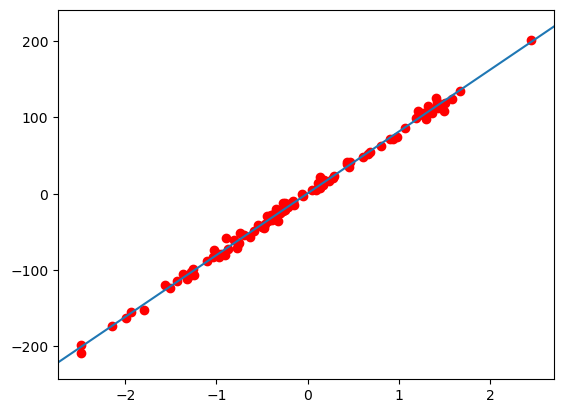

In [6]:
w = train_linear_regression(one_added_X, y)

# Visualize result
predicted_ys = one_added_X.dot(w)

plt.plot(X,y,'ro')

x_min, x_max = plt.xlim()
xs = np.array([x_min, x_max]).reshape(-1, 1)

# Construct one_added_xs 
# TODO:
# First column of one_added_xs is all ones (corresponding to x_0).
ones_added_xs = np.hstack((np.ones(xs.shape), xs))

predicted_ys = ones_added_xs.dot(w)
plt.plot(xs, predicted_ys)
plt.xlim(x_min, x_max)

- **TODO**: Discuss about advantages and disadvantages of `Linear Regression`:
    - **Ưu điểm**:
        - Dễ thấy nhất, Linear Regression dễ hiểu và có thể giải thích được cách nó hoạt động.
        - Với dữ liệu phù hợp (có xu hướng tuyến tính cao) thì Linear Regression là thuật toán tốt nhất.
    - **Nhược điểm**:
        - Linear Regression chỉ có thể dùng cho các dữ liệu có xu hướng tuyến tính do đó những dữ liệu phức tạp 
        - Tiếp theo những dữ liệu lỗi (outlier) sẽ gây ảnh hưởng lớn đến Linear Regression, nó làm lệch đi đường thẳng Linear Regression.
        - Linear Regression cũng dễ bị over-fitting.
        - Cuối cùng Linear Regression không thể biểu diễn hoàn toàn bài toán thực tế được bởi vì nó quá đơn giản.

### Error Plot

(-114.73260196701615, 111.26734189250362)

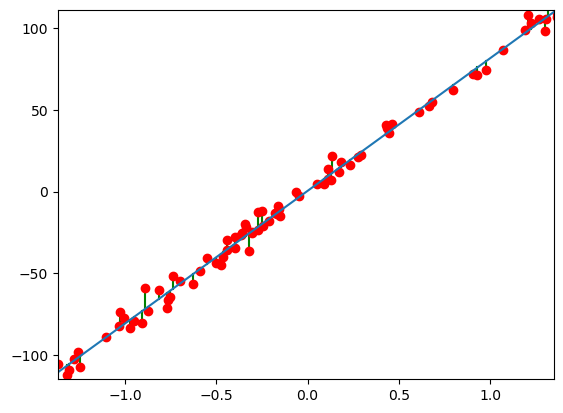

In [7]:
SCALE_VALUE = 0.5
y_predict = one_added_X.dot(w) 

for i in range(0, len(X)):
    plt.plot([X[i][0], X[i][0]], [y[i], y_predict[i]], 'g-')

plt.plot(X,y,'ro')
y_min, y_max = plt.ylim()

plt.plot(xs, predicted_ys)
plt.xlim(x_min * SCALE_VALUE, x_max * SCALE_VALUE)
plt.ylim(y_min * SCALE_VALUE, y_max * SCALE_VALUE)

### Không có outlier

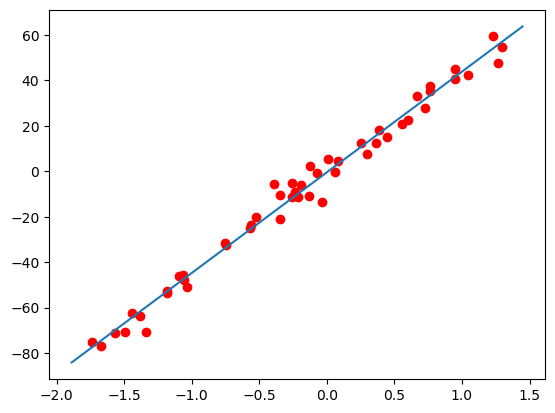

In [8]:
# không có outlier
X1 ,y1 = datasets.make_regression(n_samples=50,n_features=1, noise=5)

# huấn luyện linear regression
one_added_X1 = np.hstack((np.ones(X1.shape), X1))
w1 = np.linalg.pinv(one_added_X1.T @ one_added_X1) @ one_added_X1.T @ y1

plt.plot(X1, y1, 'ro')

x1_min, x1_max = plt.xlim()
xs1 = np.array([x1_min, x1_max]).reshape(-1, 1)

ones_added_xs1 = np.hstack((np.ones(xs1.shape), xs1))

predicted_ys1 = ones_added_xs1.dot(w1)
plt.plot(xs1, predicted_ys1)

### Có outlier

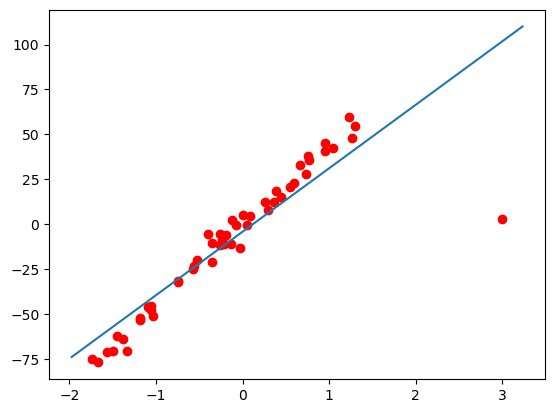

In [9]:
# có outlier
X1 = np.append(X1, 3)
X1 = X1.reshape(X1.shape[0], 1)
y1 = np.append(y1, 3)

# huấn luyện linear regression
one_added_X1 = np.hstack((np.ones(X1.shape), X1))
w1 = np.linalg.pinv(one_added_X1.T @ one_added_X1) @ one_added_X1.T @ y1

plt.plot(X1, y1, 'ro')

x1_min, x1_max = plt.xlim()
xs1 = np.array([x1_min, x1_max]).reshape(-1, 1)

ones_added_xs1 = np.hstack((np.ones(xs1.shape), xs1))

predicted_ys1 = ones_added_xs1.dot(w1)
plt.plot(xs1, predicted_ys1)